In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display

import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.metrics import classification_report
import pickle
np.random.seed(12345)

In [27]:

all_data = []

data_path_dict = {
    0: ["other_words/" + file_path for file_path in os.listdir("other_words/")],
    1: ["wake_word/" + file_path for file_path in os.listdir("wake_word/")]
}
for class_label, list_of_files in data_path_dict.items():
    for single_file in list_of_files:
        all_data.append([single_file, class_label])

200


In [29]:
#Split the dataset into train and test dataset
trainset, testset = train_test_split(all_data, test_size=0.30, random_state=100)

/var/folders/0l/p7lzlqxn44b036b_3ykx4tlr0000gn/T/ipykernel_4749/1264606663.py:24: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02577477 -0.03281224
 -0.02556213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
/var/folders/0l/p7lzlqxn44b036b_3ykx4tlr0000gn/T/ipykernel_4749/1264606663.py:24: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0615837e-04
 -8.4407642e-05 -1.2395198e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


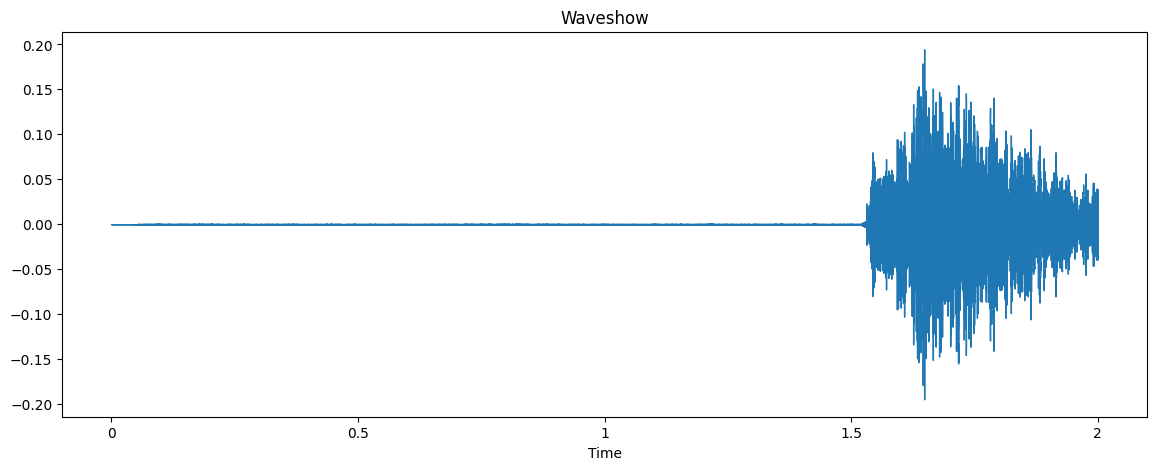

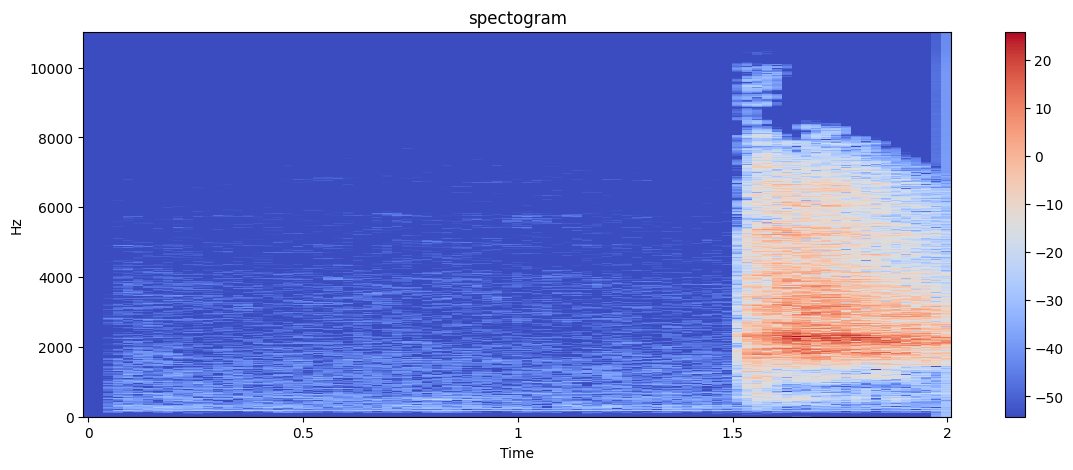

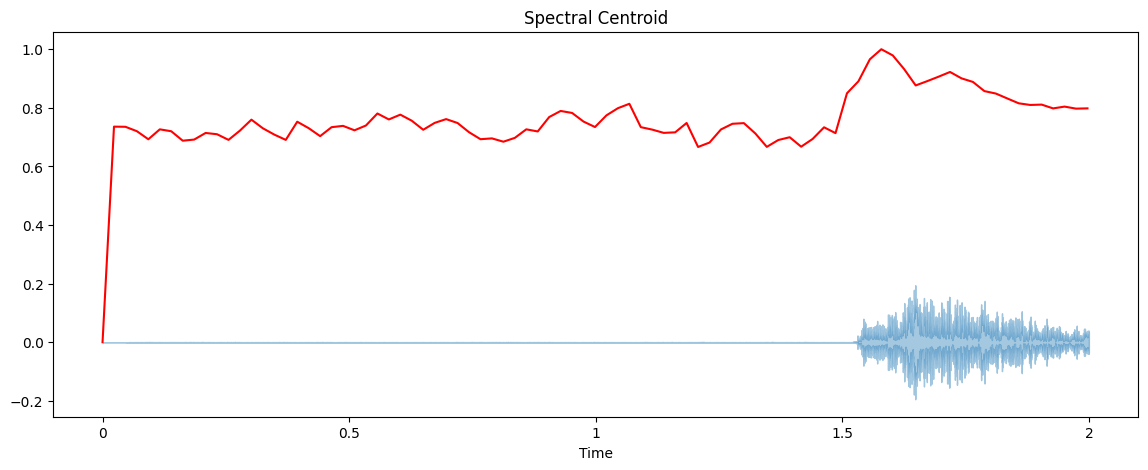

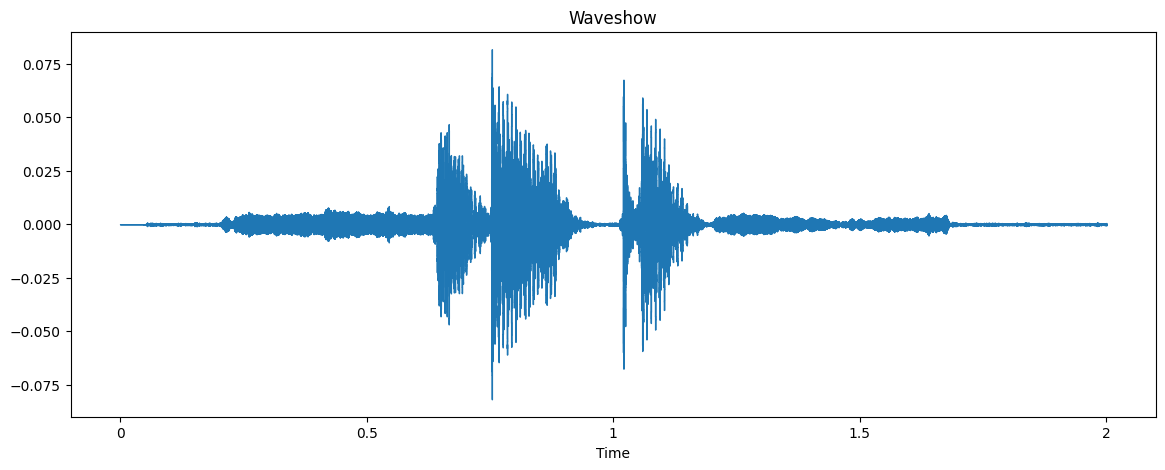

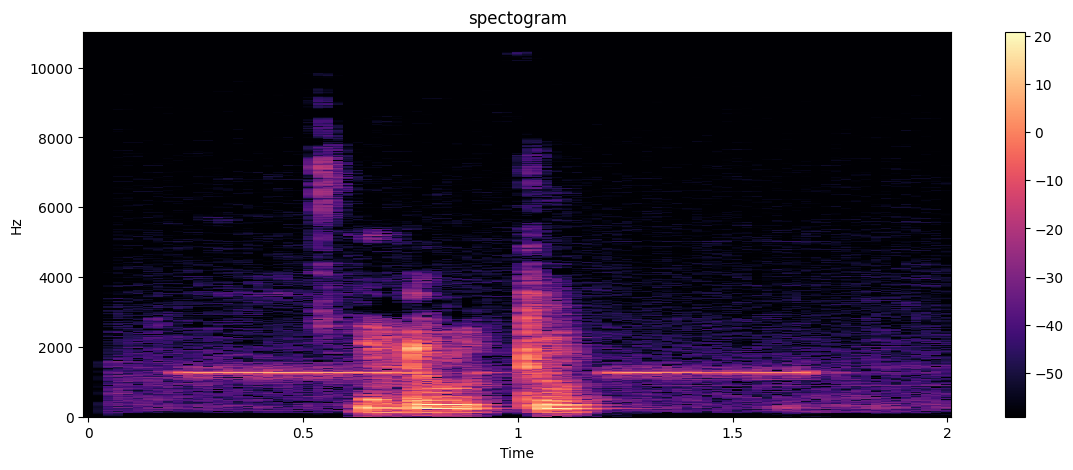

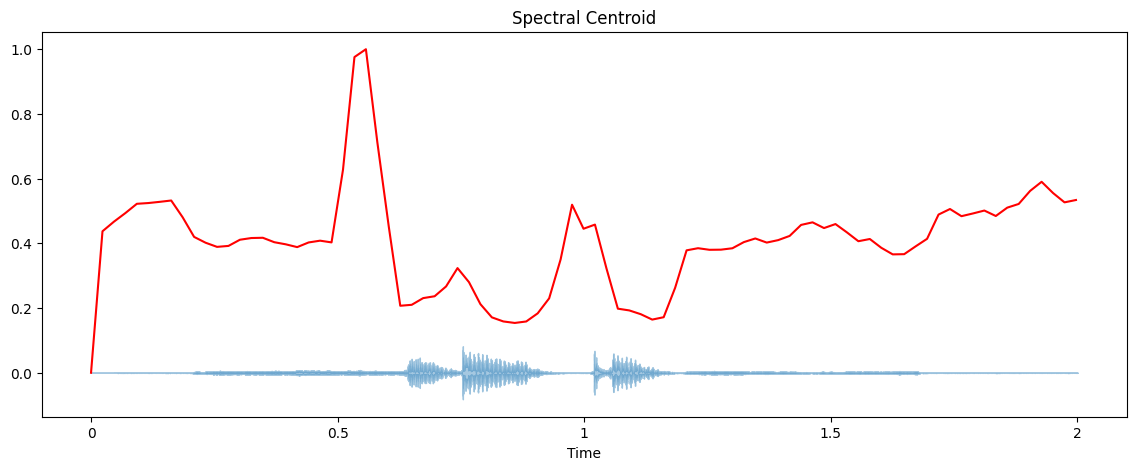

In [39]:
# View the audio files
#spectral centroid

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

n = 2
for i in range(n):

 
    x , sr = librosa.load(trainset[i][0])
 
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)
    plt.title('Waveshow')
    
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
    plt.colorbar()
    plt.title('spectogram')

    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    # Normalising the spectral centroid for visualisation
    plt.figure(figsize=(14, 5))
    #Plotting the Spectral Centroid along the waveform
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.title('Spectral Centroid')

Text(0.5, 1.0, 'Waveshow')

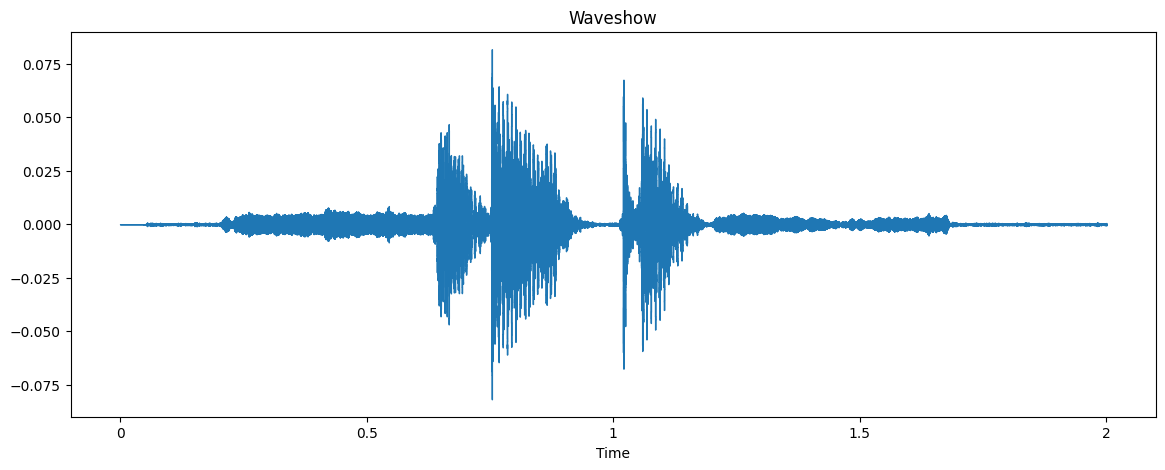

In [51]:
df = pd.DataFrame(trainset, columns=['name','label'])
df.shape[0]
x, sr = librosa.load(df.iloc[1][0])
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveshow')

In [53]:
df.iloc[1]['label']

0

In [ ]:
for i in tqdm(range(df.shape[0])):
    x , sr = librosa.load(df.iloc[i][2] + df.iloc[i][0])


In [54]:
def features(df):
    
   
    feature_dict = {'rmse':[],'chroma_stft':[], 'spec_cent':[],'spec_bw':[],'rolloff':[],'zcr':[],'mfcc':[], 'label':[], 
                'rmse_min':[],'chroma_stft_min':[], 'spec_cent_min':[],'spec_bw_min':[],'rolloff_min':[],'zcr_min':[],
                'mfcc_min':[], 'rmse_max':[],'chroma_stft_max':[], 'spec_cent_max':[],'spec_bw_max':[],'rolloff_max':[],'zcr_max':[],
                'mfcc_max':[]}

    for i in tqdm(range(df.shape[0])):
     
        x , sr = librosa.load(df.iloc[i][0])
        rmse = librosa.feature.rms(y=x)
        chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(x)
        mfcc = librosa.feature.mfcc(y=x, sr=sr)
        
        target = df.iloc[i]['label']
       
        # mean
     
        feature_dict['rmse'].append(np.mean(rmse))
        feature_dict['chroma_stft'].append(np.mean(chroma_stft))
        feature_dict['spec_cent'].append(np.mean(spec_cent))
        feature_dict['spec_bw'].append(np.mean(spec_bw))
        feature_dict['rolloff'].append(np.mean(rolloff))
        feature_dict['zcr'].append(np.mean(zcr))
        feature_dict['mfcc'].append(np.mean(mfcc))
        feature_dict['label'].append(target)
 
        # min
        feature_dict['rmse_min'].append(np.min(rmse))
        feature_dict['chroma_stft_min'].append(np.min(chroma_stft))
        feature_dict['spec_cent_min'].append(np.min(spec_cent))
        feature_dict['spec_bw_min'].append(np.min(spec_bw))
        feature_dict['rolloff_min'].append(np.min(rolloff))
        feature_dict['zcr_min'].append(np.min(zcr))
        feature_dict['mfcc_min'].append(np.min(mfcc))
   
        # max
        feature_dict['rmse_max'].append(np.max(rmse))
        feature_dict['chroma_stft_max'].append(np.max(chroma_stft))
        feature_dict['spec_cent_max'].append(np.max(spec_cent))
        feature_dict['spec_bw_max'].append(np.max(spec_bw))
        feature_dict['rolloff_max'].append(np.max(rolloff))
        feature_dict['zcr_max'].append(np.max(zcr))
        feature_dict['mfcc_max'].append(np.max(mfcc))
        
        
        
    return feature_dict

In [56]:
#Extract features (train data)
trainset_df = pd.DataFrame(trainset, columns=['name','label'])
temp = features(trainset_df)
df_train = pd.DataFrame(temp)
df_train.head

  0%|          | 0/140 [00:00<?, ?it/s]

/Users/monusingh/opt/miniconda3/envs/venv-cap/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)


<bound method NDFrame.head of          rmse  chroma_stft    spec_cent      spec_bw      rolloff       zcr  \
0    0.008573     0.531725  2622.942707  2062.786969  4883.086948  0.163080   
1    0.004971     0.273062  1596.778524  1524.102813  2564.059974  0.093716   
2    0.008077     0.513838  2158.866993  1937.711709  4185.485419  0.129647   
3    0.000134     0.650626  2474.356343  2347.850154  5095.201374  0.142275   
4    0.012192     0.522262  2503.400232  1633.606266  4072.621734  0.191827   
..        ...          ...          ...          ...          ...       ...   
135  0.005303     0.434964  1835.465213  1690.066323  3465.731917  0.121677   
136  0.007348     0.451857  2163.283002  1895.090043  4137.097589  0.128019   
137  0.003916     0.546416  2650.387466  1771.249657  4508.978482  0.192248   
138  0.003067     0.554831  2851.611034  2098.208112  5091.983769  0.208367   
139  0.006248     0.488465  2331.058990  1759.301692  4099.600114  0.159617   

          mfcc  label

In [57]:
#Extract features (test data)

testset_df = pd.DataFrame(testset, columns=['name','label'])
temp = features(testset_df)
df_test = pd.DataFrame(temp)
df_test.head

  0%|          | 0/60 [00:00<?, ?it/s]

<bound method NDFrame.head of         rmse  chroma_stft    spec_cent      spec_bw      rolloff       zcr  \
0   0.005566     0.508484  2301.226502  1963.165886  4368.393891  0.146451   
1   0.006235     0.444542  2305.081732  1946.226514  4350.573310  0.140810   
2   0.005138     0.303979  1833.596465  1649.821571  3321.805967  0.108836   
3   0.013771     0.476176  2390.267900  1627.677887  3896.024717  0.179362   
4   0.007352     0.529336  2324.650246  2032.516724  4471.728516  0.140664   
5   0.006892     0.548319  2423.626630  2048.234899  4610.951812  0.157833   
6   0.008454     0.485417  2176.766682  1833.597753  3960.005556  0.141927   
7   0.006836     0.282070  2540.355113  1901.331985  4398.218615  0.165033   
8   0.004642     0.457681  1920.779870  1852.596344  3813.357018  0.111822   
9   0.009155     0.440199  2186.757261  1671.884444  3508.550815  0.160330   
10  0.004687     0.508970  2165.727305  1940.474598  4297.111564  0.127267   
11  0.000528     0.588670  2370.78

In [58]:
df_train.columns

Index(['rmse', 'chroma_stft', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'mfcc',
       'label', 'rmse_min', 'chroma_stft_min', 'spec_cent_min', 'spec_bw_min',
       'rolloff_min', 'zcr_min', 'mfcc_min', 'rmse_max', 'chroma_stft_max',
       'spec_cent_max', 'spec_bw_max', 'rolloff_max', 'zcr_max', 'mfcc_max'],
      dtype='object')

In [59]:
#seperate target from features
X_train = df_train.loc[:, df_train.columns != 'label']
y_train = df_train['label']

X_test = df_test.loc[:, df_test.columns != 'label']
y_test = df_test['label']
print(X_train)

         rmse  chroma_stft    spec_cent      spec_bw      rolloff       zcr  \
0    0.008573     0.531725  2622.942707  2062.786969  4883.086948  0.163080   
1    0.004971     0.273062  1596.778524  1524.102813  2564.059974  0.093716   
2    0.008077     0.513838  2158.866993  1937.711709  4185.485419  0.129647   
3    0.000134     0.650626  2474.356343  2347.850154  5095.201374  0.142275   
4    0.012192     0.522262  2503.400232  1633.606266  4072.621734  0.191827   
..        ...          ...          ...          ...          ...       ...   
135  0.005303     0.434964  1835.465213  1690.066323  3465.731917  0.121677   
136  0.007348     0.451857  2163.283002  1895.090043  4137.097589  0.128019   
137  0.003916     0.546416  2650.387466  1771.249657  4508.978482  0.192248   
138  0.003067     0.554831  2851.611034  2098.208112  5091.983769  0.208367   
139  0.006248     0.488465  2331.058990  1759.301692  4099.600114  0.159617   

          mfcc  rmse_min  chroma_stft_min  spec_cen

In [60]:
#Scale the x values
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[0.48372633 0.80669149 0.87337922 ... 0.58751394 0.42951907 0.28375631]
 [0.28046259 0.41426808 0.5316903  ... 0.73467113 0.22885572 0.87913445]
 [0.45571243 0.77955528 0.71885275 ... 0.70234114 0.44195688 0.92470443]
 ...
 [0.2209453  0.82897907 0.88251769 ... 0.57413601 0.51658375 0.34241424]
 [0.17304835 0.84174562 0.94952048 ... 0.72240803 0.73797678 0.64480599]
 [0.35253729 0.74106111 0.7761887  ... 0.80156076 0.59369818 0.75244553]]


In [61]:
#A Neural network model and train

mlp = MLPClassifier(activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

/Users/monusingh/opt/miniconda3/envs/venv-cap/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500)

In [62]:

# Predict
y_pred = mlp.predict(X_test)

print('The prediction accuracy is: ', round(accuracy_score(y_test, y_pred),2)*100)

The prediction accuracy is:  88.0


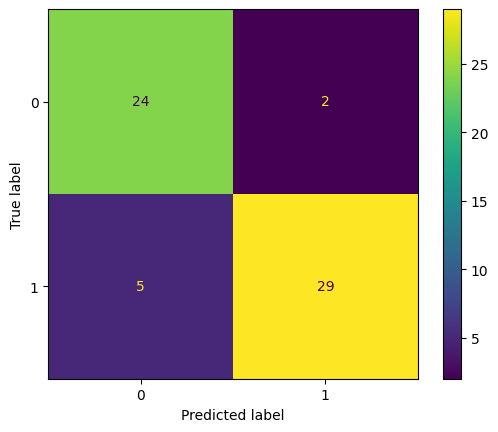

In [63]:
#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.show()

In [64]:
#Classifcation report
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87        26
         Yes       0.94      0.85      0.89        34

    accuracy                           0.88        60
   macro avg       0.88      0.89      0.88        60
weighted avg       0.89      0.88      0.88        60



In [66]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [81]:
y_train.shape

(140,)

In [82]:
model = Sequential([
    Dense(256, input_shape=X_train.shape),
    Activation('relu'),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 140, 256)          5632      
                                                                 
 activation_2 (Activation)   (None, 140, 256)          0         
                                                                 
 dropout_2 (Dropout)         (None, 140, 256)          0         
                                                                 
 dense_4 (Dense)             (None, 140, 256)          65792     
                                                                 
 activation_3 (Activation)   (None, 140, 256)          0         
                                                                 
 dropout_3 (Dropout)         (None, 140, 256)          0         
                                                                 
 dense_5 (Dense)             (None, 140, 2)           

In [83]:
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

In [87]:
y_train

0

In [85]:
print("Model Score: \n")
history = model.fit(X_train, y_train, epochs=1000)

Model Score: 

Epoch 1/1000


ValueError: in user code:

    File "/Users/monusingh/opt/miniconda3/envs/venv-cap/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/monusingh/opt/miniconda3/envs/venv-cap/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/monusingh/opt/miniconda3/envs/venv-cap/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/monusingh/opt/miniconda3/envs/venv-cap/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/Users/monusingh/opt/miniconda3/envs/venv-cap/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/monusingh/opt/miniconda3/envs/venv-cap/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 140, 21), found shape=(None, 21)
